In [1]:
# comparing ransac and huber regression results:
import pandas as pd

base_dir = "C:/Users/Xin/Dropbox/BrainImaging_ML/"
work_dir= base_dir + "multidimensional_age_prediction/"
result_dir = work_dir + "out01_robustreg_behav_hc2_stdz_age_reverse_fa"

feature_beta_df1 = pd.read_csv(result_dir+'/out01_behav_feature_beta_ransac_lr_thresh1.csv')
feature_beta_df1.drop(columns = ['modality', 'Rsquare', 'RsquareMedian'], inplace = True)
feature_beta_df1.columns.values[0] = 'feature'


feature_beta_df2 = pd.read_csv(result_dir+'/out01_behav_feature_beta_huber.csv')
feature_beta_df2.drop(columns = ['modality', 'Rsquare', 'RsquareMedian'], inplace = True)
feature_beta_df2.columns = feature_beta_df1.columns

feature_beta_df3 = pd.read_csv(result_dir+'/out01_behav_feature_beta_huber0.9.csv')
feature_beta_df3.drop(columns = ['modality', 'Rsquare', 'RsquareMedian'], inplace = True)
feature_beta_df3.columns = feature_beta_df1.columns

feature_beta_df4 = pd.read_csv(result_dir+'/out01_behav_feature_beta_huber1.9.csv')
feature_beta_df4.drop(columns = ['modality', 'Rsquare', 'RsquareMedian'], inplace = True)
feature_beta_df4.columns = feature_beta_df1.columns

feature_beta_df1 = pd.melt(feature_beta_df1, id_vars  = ['feature'])
feature_beta_df2 = pd.melt(feature_beta_df2, id_vars  = ['feature'])
feature_beta_df3 = pd.melt(feature_beta_df3, id_vars  = ['feature'])
feature_beta_df4 = pd.melt(feature_beta_df4, id_vars  = ['feature'])

# feature_beta_df_all = feature_beta_df1.merge(feature_beta_df2, on = ['feature', 'variable'])
# feature_beta_df_all = feature_beta_df_all.merge(feature_beta_df3, on = ['feature', 'variable'])
# feature_beta_df_all = feature_beta_df_all.merge(feature_beta_df4, on = ['feature', 'variable'])

feature_beta_df_all = pd.concat([feature_beta_df1, feature_beta_df2['value'], feature_beta_df3['value'], feature_beta_df4['value']],
                                axis = 1)

feature_beta_df_all.columns.values[2:] = ['ransac', 'huber1.345', 'huber.9', 'huber1.9']

feature_beta_df_all

,feature,variable,ransac,huber1.345,huber.9,huber1.9
0,Left Precentral,age,-0.429750,-0.424842,-0.421233,-0.432032
1,Right Precentral,age,-0.358167,-0.345631,-0.338351,-0.347059
2,Left Superior Frontal,age,-0.385477,-0.391929,-0.400780,-0.388668
3,Right Superior Frontal,age,-0.231689,-0.233433,-0.234711,-0.237683
4,Left Superior Frontal Orbital,age,-0.440276,-0.423385,-0.416575,-0.427629
...,...,...,...,...,...,...
925,Superior.longitudinal.fasciculus.R(tract),age$^2$*gender,-0.041299,-0.039386,-0.020066,-0.048230
926,Uncinate.fasciculus.L(tract),age$^2$*gender,-0.153439,-0.129653,-0.121664,-0.135853
927,Uncinate.fasciculus.R(tract),age$^2$*gender,-0.087803,-0.101126,-0.104278,-0.104021
928,Superior.longitudinal.fasciculus.(temporal.pa...,age$^2$*gender,-0.064922,-0.070557,-0.069842,-0.067038


C:\Users\Xin\Anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


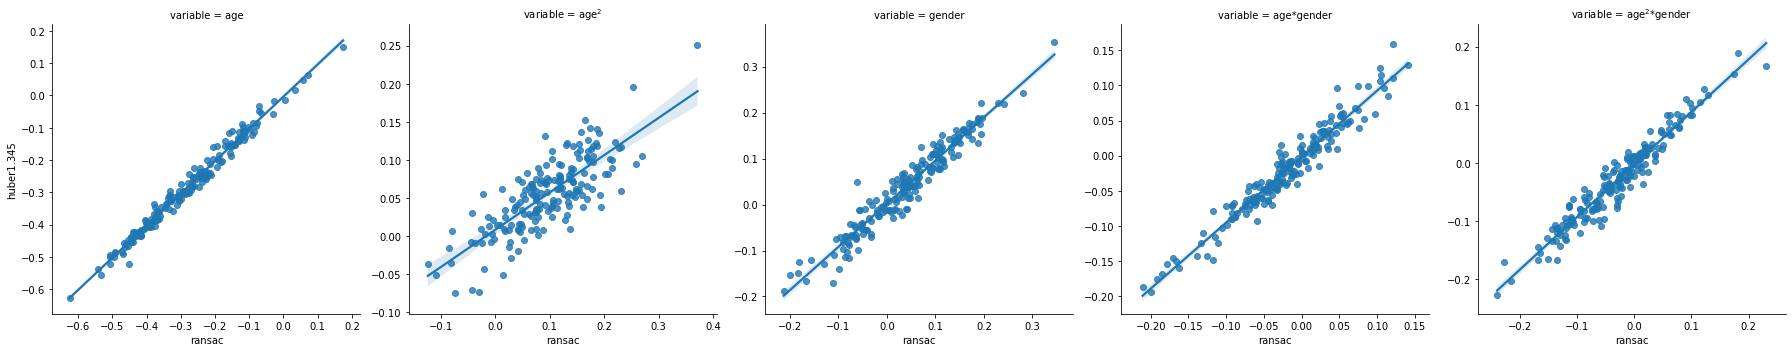

In [2]:
import seaborn as sns

sns.lmplot(x = 'ransac', y = 'huber1.345', data = feature_beta_df_all, 
           col = 'variable', order = 1, sharex = False, sharey = False, size = 5
          )

C:\Users\Xin\Anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


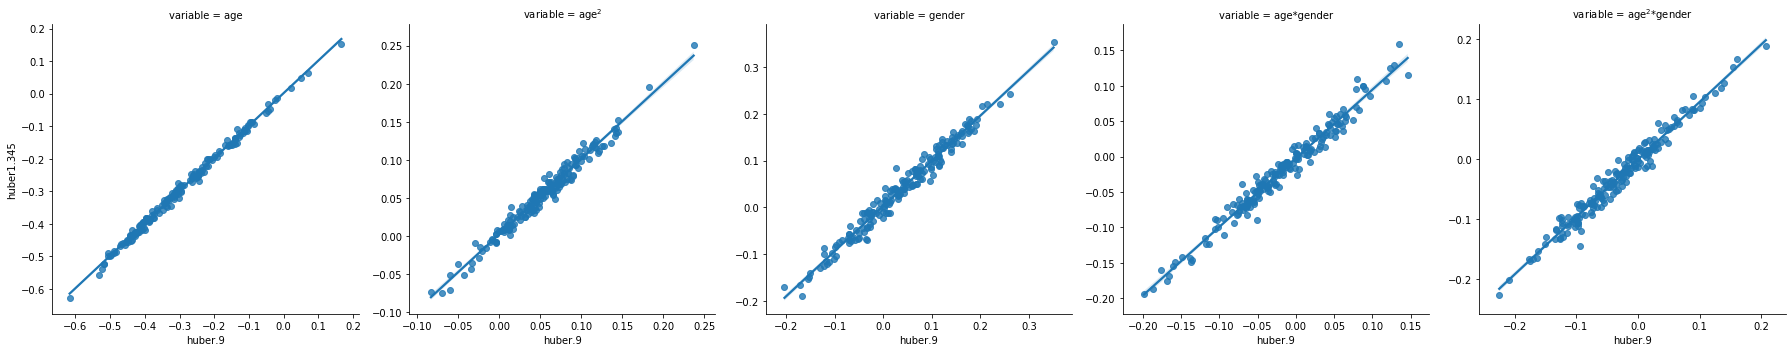

In [3]:
sns.lmplot(x = 'huber.9', y = 'huber1.345', data = feature_beta_df_all, 
           col = 'variable', order = 1, sharex = False, sharey = False, size = 5
          )

C:\Users\Xin\Anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


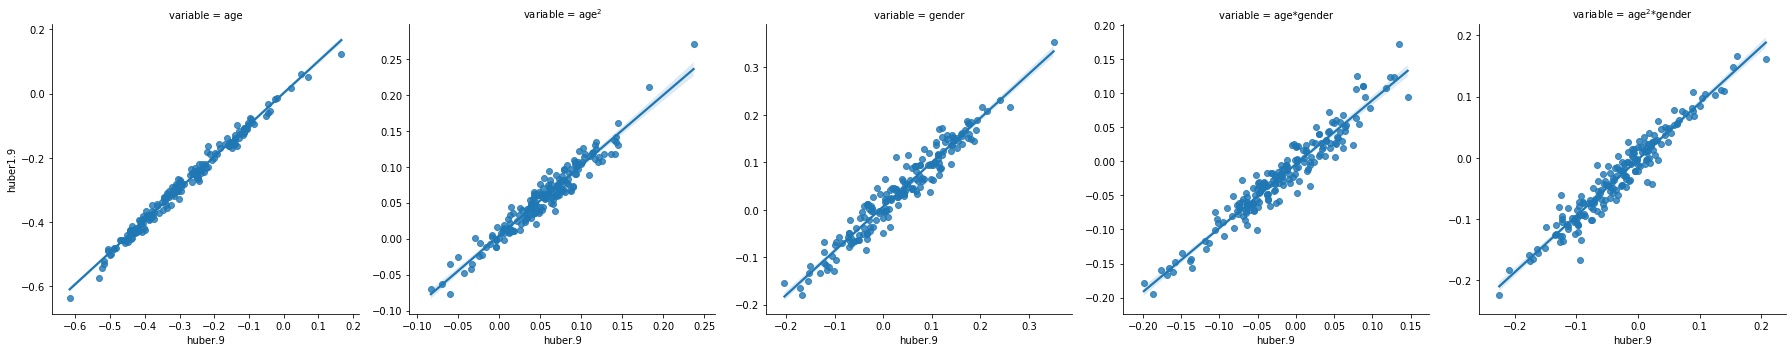

In [4]:
sns.lmplot(x = 'huber.9', y = 'huber1.9', data = feature_beta_df_all, 
           col = 'variable', order = 1, sharex = False, sharey = False, size = 5
          )